# Projeto Integrador IV - IoT e Aprendizado de Máquina

Este notebook apresenta um exemplo de como utilizar um **termo-higrômetro** para monitoramento de um estoque de alimentos
e aplicar **técnicas de aprendizado de máquina** para apoiar a decisão sobre a compra de um ar condicionado.


## Objetivo do Projeto

O objetivo central do Projeto Integrador IV é:

- **Analisar a coleção de dados gerada por meio de um modelo de aprendizado artificial para classificar as temperaturas e umidade relativa do ar em duas classes: “adequado” (temperatura < 25 ºC e umidade < 70%) e “inadequado” (temperatura > 25 ºC ou umidade ≥ 70%) para a estocagem de alimentos.**
- **Preparar uma interface para visualização dos resultados** 

O termo-hidrômetro é a fonte de dados (IoT) para os quais são aplicados alguns métodos de aprendizado de máquina para:
1. Previsão de condições futuras (análise preditiva).
2. Classificação de condições de risco.
3. Detecção de anomalias.


## Carregamento e Tratamento dos Dados Reais

Nesta etapa, são carregados os dados de temperatura e umidade de um **dispositivo IoT** (termo-hidrômetro) a partir do arquivo fornecido.

In [36]:
import pandas as pd
import numpy as np

# O nome do arquivo com os dados reais
file_path = 'dados_pi4_13a19set.txt'

# Ler o arquivo de texto, ignorando as duas primeiras linhas de metadados
# e especificando a codificação correta para tratar o Byte Order Mark (BOM)
df = pd.read_csv(file_path, sep='\t', skiprows=2, encoding='utf-16')

# Renomear as colunas para facilitar o uso
df.columns = ['data', 'temperatura', 'umidade', 'ponto_orvalho', 'vpd']

# Juntar as colunas 'data' e 'horário'
df['data'] = pd.to_datetime(df['data'], format='%m/%d/%Y %H:%M')

# O arquivo usa vírgula como separador decimal. Substituímos por ponto para converter para numérico.
df['temperatura'] = df['temperatura'].str.replace(',', '.').astype(float)
df['umidade'] = df['umidade'].str.replace(',', '.').astype(float)

print(df.head())
print(df.info())


                 data  temperatura  umidade ponto_orvalho   vpd
0 2025-09-13 15:00:00         25.5     44.4         12,48  1,81
1 2025-09-13 16:00:00         25.3     43.7         12,05  1,82
2 2025-09-13 17:00:00         25.2     44.1          12,1  1,79
3 2025-09-13 18:00:00         24.8     45.7         12,28   1,7
4 2025-09-13 19:00:00         25.1     49.5         13,78  1,61
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           143 non-null    datetime64[ns]
 1   temperatura    143 non-null    float64       
 2   umidade        143 non-null    float64       
 3   ponto_orvalho  143 non-null    object        
 4   vpd            143 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 5.7+ KB
None


## Visualização Inicial dos Dados


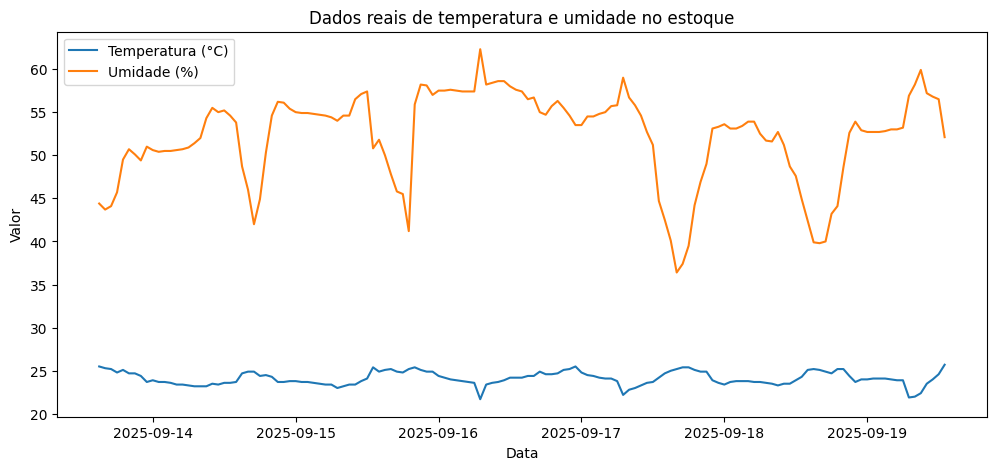

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df["data"], df["temperatura"], label="Temperatura (°C)")
plt.plot(df["data"], df["umidade"], label="Umidade (%)")
plt.legend()
plt.title("Dados reais de temperatura e umidade no estoque")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.show()


## 1. Previsão de Condições Futuras (Análise Preditiva)

Vamos aplicar um modelo simples de **regressão linear** para prever a temperatura com base no tempo.


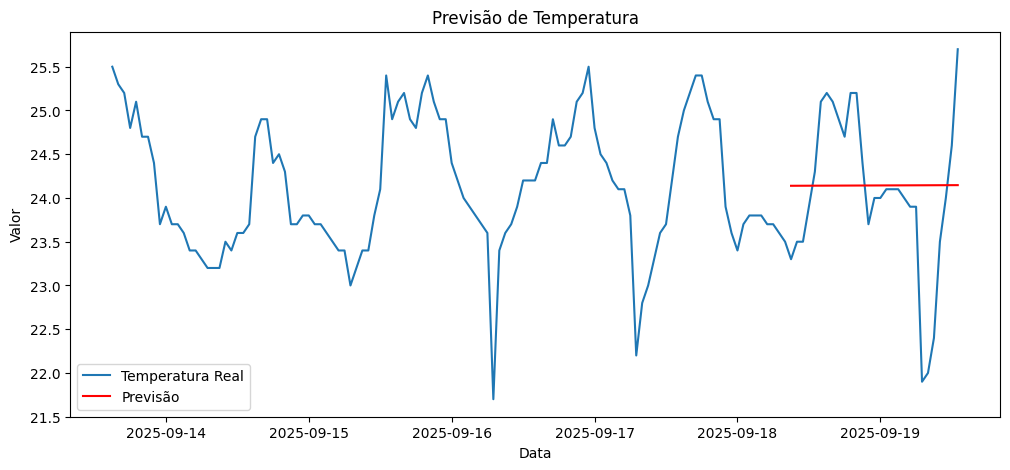

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Criar variável numérica de tempo a partir do índice, como o número de horas desde o início da coleta
df["hora"] = np.arange(len(df))

X = df[["hora"]]
y = df["temperatura"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(df["data"], y, label="Temperatura Real")
plt.plot(df["data"].iloc[len(X_train):], preds, label="Previsão", color="red")
plt.legend()
plt.title("Previsão de Temperatura")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.show()


## 2. Classificação de Condições de Armazenamento

Classificaremos as condições de armazenamento em duas categorias:
- **Adequado**: Temperatura $< 25$ ºC e Umidade $< 70$ %
- **Inadequado**: Temperatura $> 25$ ºC ou Umidade $\ge 70$ %


In [39]:
def classificar_condicao(temp, umid):
    if temp < 25 and umid < 70:
        return "Adequado"
    else:
        return "Inadequado"

df['condicao_armazenamento'] = df.apply(lambda row: classificar_condicao(row['temperatura'], row['umidade']), axis=1)
df[['data', 'temperatura', 'umidade', 'condicao_armazenamento']].head()


,data,temperatura,umidade,condicao_armazenamento
0,2025-09-13 15:00:00,25.5,44.4,Inadequado
1,2025-09-13 16:00:00,25.3,43.7,Inadequado
2,2025-09-13 17:00:00,25.2,44.1,Inadequado
3,2025-09-13 18:00:00,24.8,45.7,Adequado
4,2025-09-13 19:00:00,25.1,49.5,Inadequado


## 3. Detecção de Anomalias

Gráfico boxplot para detectar e demonstrar valores anômalos de temperatura.


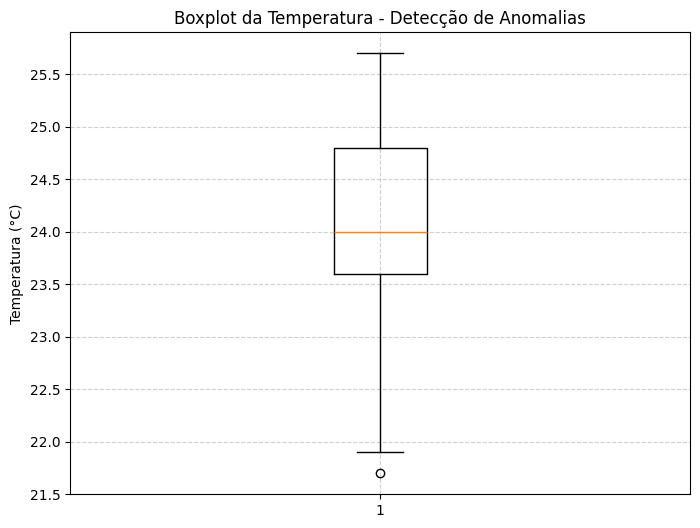

In [40]:
import matplotlib.pyplot as plt

# Criar um boxplot da coluna 'temperatura' para visualizar anomalias
plt.figure(figsize=(8, 6))
plt.boxplot(df['temperatura'])

# Adicionar título e rótulos
plt.title('Boxplot da Temperatura - Detecção de Anomalias')
plt.ylabel('Temperatura (°C)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 4. Detecção de Anomalias

Gráfico boxplot para detectar e demonstrar valores anômalos de umidade.

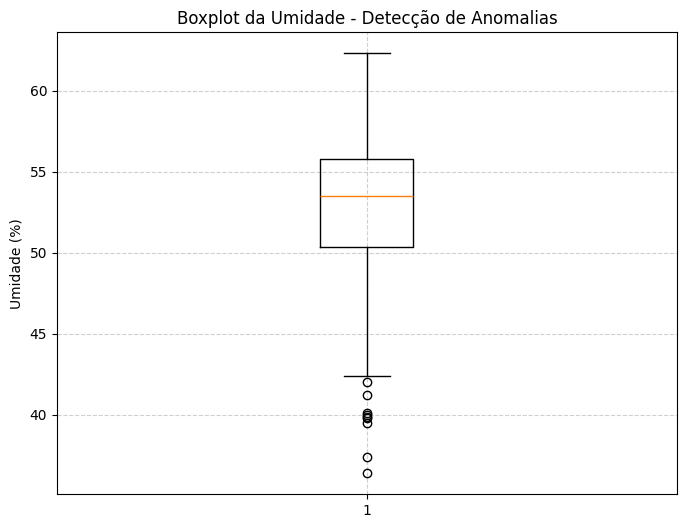

In [41]:
import matplotlib.pyplot as plt

# Criar um boxplot da coluna 'umidade' para visualizar anomalias
plt.figure(figsize=(8, 6))
plt.boxplot(df['umidade'])

# Adicionar título e rótulos
plt.title('Boxplot da Umidade - Detecção de Anomalias')
plt.ylabel('Umidade (%)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Conclusão

- O termo-higrômetro fornece dados IoT essenciais.  
- O aprendizado de máquina permite **prever, classificar e detectar anomalias**.  
- A frequência de condições de risco e anomalias pode justificar a **compra de um ar condicionado** para manter a qualidade dos alimentos.  
